## Análise de Regressão Simples

### Problema 3

Neste exercício vamos fazer uma análise de regressão com a base de dados autos.csv para tentar prever o preço de carro a partir de sua potência. Na nossa base de dados, estas variáveis são horsepower e price.
Utilizando então a base disponibilizada, você deve:

a)    Criar um dicionário de dados, para entender o significado o tipo de cada variável; veja no link fornecido se há documentação disponível. 
http://archive.ics.uci.edu/ml/datasets/Automobile

No link da base de dados temos a documentação com o detalhamento das variáveis do conjunto de dados:

1. make: Fabricante do veículo, categóricio nominal. alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo
2. fuel-type, tipo de combustível, categórico ordinal: diesel, gas.
3. aspiration, coleta de ar para o motor, categórico ordinal: std, turbo.
4. num-of-doors, número de portas, numérica discreta: four, two.
5. body-style, tipo de veículo, categórico ordinal: hardtop, wagon, sedan, hatchback, convertible.
6. drive-wheels, tração, categórico ordinal: 4wd, fwd, rwd.
7. engine-location, pósição do motor, categórico nominal: front, rear.
8. wheel-base, distância entre eixos, numérica contínua: continuous from 86.6 120.9.
9. length, comprimento, numérica contínua: continuous from 141.1 to 208.1.
10. width, largura, numérica contínua: continuous from 60.3 to 72.3.
11. height, altura, numérica contínua: continuous from 47.8 to 59.8.
12. curb-weight, peso, numérica contínua: continuous from 1488 to 4066.
13. engine-type, tipo de motor, categórico ordinal: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
14. num-of-cylinders, número de cilindros, numérica discreta: eight, five, four, six, three, twelve, two.
15. engine-size, tamanho do motor, numérica discreta: continuous from 61 to 326.
16. fuel-system, Sistema de combustível, categórico ordinal: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
17. bore, furação, numérica contínua: continuous from 2.54 to 3.94.
18. stroke, curso, numérica contínua: continuous from 2.07 to 4.17.
19. compression-ratio, taxa de compressão, numérica discreta: continuous from 7 to 23.
20. horsepower, potência, numérica contínua: continuous from 48 to 288.
21. peak-rpm: RPM, numérica contínua: continuous from 4150 to 6600.
22. city-mpg, quilometragem média na cidade, numérica contínua: continuous from 13 to 49.
23. highway-mpg, quilometragem média na estrada, numérica contínua: continuous from 16 to 54.
24. price, preço, numérica contínua: continuous from 5118 to 45400.


b)    Carregar a base para o R, certificando-se de que os dados estão corretos, de acordo com o dicionário de dados.

In [12]:
# Carregando bibliotecas
library('dplyr')
library('ggplot2')

In [2]:
# Importando dados
carros = read.csv('autos.csv', sep = ';')
head(carros)

,make,fuel.type,aspiration,num.doors,body.style,drive.wheels,engine.location,wheel.base,length,width,⋯,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,price
,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>
1,alfa-romero,gas,std,2,convertible,rwd,front,"88,6","168,8","64,1",⋯,130,mpfi,"3,47","2,68",9,111,5000,21,27,13495
2,alfa-romero,gas,std,2,convertible,rwd,front,"88,6","168,8","64,1",⋯,130,mpfi,"3,47","2,68",9,111,5000,21,27,16500
3,alfa-romero,gas,std,2,hatchback,rwd,front,"94,5","171,2","65,5",⋯,152,mpfi,"2,68","3,47",9,154,5000,19,26,16500
4,audi,gas,std,4,sedan,fwd,front,"99,8","176,6","66,2",⋯,109,mpfi,"3,19","3,4",10,102,5500,24,30,13950
5,audi,gas,std,4,sedan,4wd,front,"99,4","176,6","66,4",⋯,136,mpfi,"3,19","3,4",8,115,5500,18,22,17450
6,audi,gas,std,2,sedan,fwd,front,"99,8","177,3","66,3",⋯,136,mpfi,"3,19","3,4","8,5",110,5500,19,25,15250


c)    Explore a base de dados:
* i)        Sumários estatísticos dos dados
* ii)        Tabelas quando apropriado
* iii)        Gráficos exploratórios apropriados.

In [3]:
str(carros)

'data.frame':	193 obs. of  24 variables:
 $ make             : Factor w/ 21 levels "alfa-romero",..: 1 1 1 2 2 2 2 2 2 3 ...
 $ fuel.type        : Factor w/ 2 levels "diesel","gas": 2 2 2 2 2 2 2 2 2 2 ...
 $ aspiration       : Factor w/ 2 levels "std","turbo": 1 1 1 1 1 1 1 1 2 1 ...
 $ num.doors        : int  2 2 2 4 4 2 4 4 4 2 ...
 $ body.style       : Factor w/ 5 levels "convertible",..: 1 1 3 4 4 4 4 5 4 4 ...
 $ drive.wheels     : Factor w/ 3 levels "4wd","fwd","rwd": 3 3 3 2 1 2 2 2 2 3 ...
 $ engine.location  : Factor w/ 2 levels "front","rear": 1 1 1 1 1 1 1 1 1 1 ...
 $ wheel.base       : Factor w/ 50 levels "100,4","101,2",..: 25 25 33 50 49 50 12 12 12 2 ...
 $ length           : Factor w/ 71 levels "141,1","144,6",..: 23 23 29 44 44 46 64 64 64 45 ...
 $ width            : Factor w/ 41 levels "60,3","61,8",..: 9 9 17 21 23 22 39 39 39 13 ...
 $ height           : Factor w/ 46 levels "47,8","48,8",..: 2 2 12 24 24 17 34 34 35 24 ...
 $ curb.weight      : int  2548 2548 282

In [4]:
summary(carros)

         make     fuel.type   aspiration    num.doors           body.style
 toyota    :32   diesel: 19   std  :158   Min.   :2.000   convertible: 6  
 nissan    :18   gas   :174   turbo: 35   1st Qu.:2.000   hardtop    : 8  
 honda     :13                            Median :4.000   hatchback  :63  
 mitsubishi:13                            Mean   :3.161   sedan      :92  
 mazda     :12                            3rd Qu.:4.000   wagon      :24  
 subaru    :12                            Max.   :4.000                   
 (Other)   :93                                                            
 drive.wheels engine.location   wheel.base      length        width    
 4wd:  8      front:190       93,7   : 19   157,3  : 14   63,8   : 23  
 fwd:114      rear :  3       94,5   : 19   188,8  : 11   66,5   : 21  
 rwd: 71                      95,7   : 13   166,3  :  7   65,4   : 15  
                              96,5   :  8   171,7  :  7   64,4   : 10  
                              97,3   :  

d)    Considerando então apenas uma variável preditora (explicativa) no modelo (horsepower), tente ajustar um modelo para explicar o preço (price) dos carros.

In [7]:
# Criando a regressão considerando a variável preditora horsepower
reg = lm(price ~ horsepower, data=carros)
reg


Call:
lm(formula = price ~ horsepower, data = carros)

Coefficients:
(Intercept)   horsepower  
    -4630.7        173.1  


* i)        Qual sua intuição sobre o relacionamento da “potência” de um carro com o seu preço?

`geom_smooth()` using formula 'y ~ x'



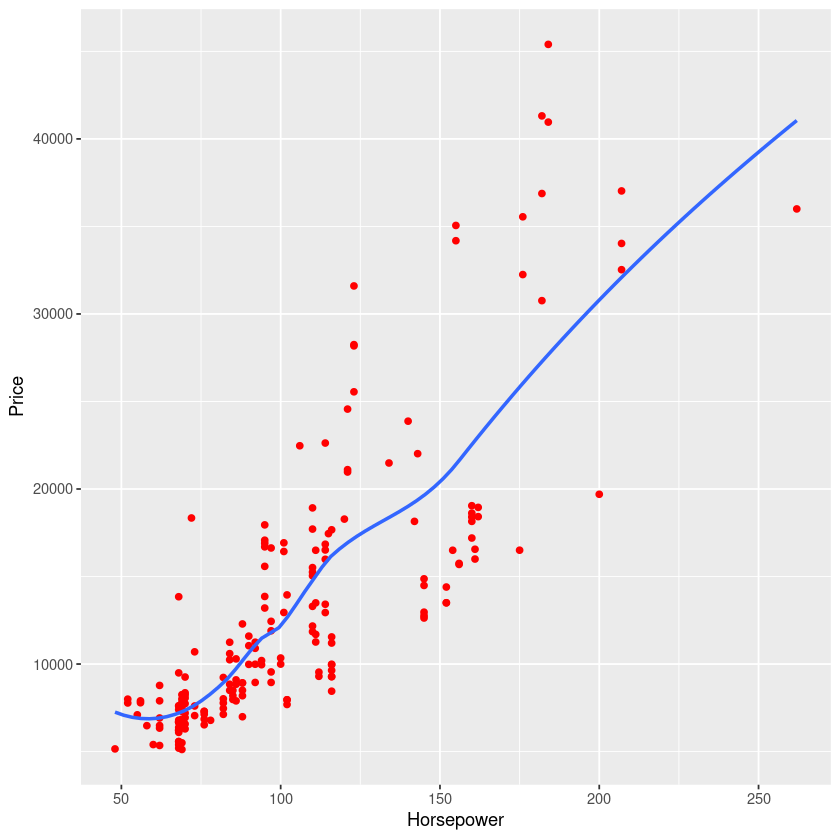

In [15]:
grafico <- ggplot(data = carros, aes(x = horsepower, y = price)) +
 geom_point(color = "red", fill="blue") + xlab("Horsepower") + ylab("Price") +
 geom_smooth(method="loess",se = F)
grafico

Acredito que carros com potências maiores terão preços maiores.

e)    Faça todas as análises da regressão (modelo), julgando:
* i)        Os gráficos diagnósticos

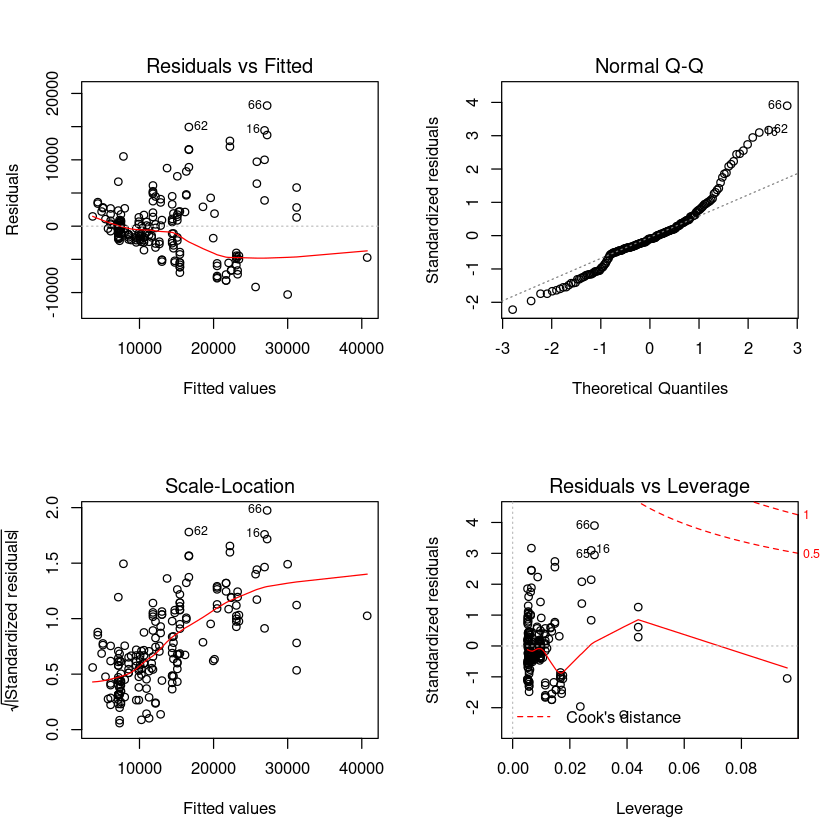

In [6]:
par(mfrow=c(2,2))
plot(reg)

No gráfico de resíduos temos uma distribuição aletória. O padrão se assemelha a uma reta.

No gráfico normal QQ temos um comportamento linear entre -1 e 1, com um desvio da normalidade para valores fora dessa faixa.

* ii)        Os parâmetros obtidos (avaliar o summary do modelo)

In [8]:
summary(reg)


Call:
lm(formula = price ~ horsepower, data = carros)

Residuals:
     Min       1Q   Median       3Q      Max 
-10296.1  -2243.5   -450.1   1794.7  18174.9 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4630.70     990.58  -4.675 5.55e-06 ***
horsepower    173.13       8.99  19.259  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4728 on 191 degrees of freedom
Multiple R-squared:  0.6601,	Adjusted R-squared:  0.6583 
F-statistic: 370.9 on 1 and 191 DF,  p-value: < 2.2e-16


* Resíduos: Estão com uma distribuição mais ou menos simétrica (lado mínimo um pouco menor que o lado positivo). Pelo nível de valores mínimos e máximos podemos dizer que a mediana está próxima de zero
* Significância estatística dos coeficientes: Próxima de 0
* Percentual de variância explicada pelo modelo: 0,6583

f)     Interprete os resultados do ajuste:
* i)        Em que posição a reta corta o eixo Y? Isso faz sentido?

In [18]:
# determinando parâmetros da reta
SX <- sum(carros$horsepower)
SX

[1] 19972

In [20]:
SSX <- sum((carros$horsepower - mean(carros$horsepower))^2)
SSX

[1] 276666.2

In [21]:
SY <- sum(carros$price)
SY

[1] 2564010

In [22]:
SSY <- sum((carros$price - mean(carros$price))^2)
SSY

[1] 12563186291

In [23]:
SSXY <- sum((carros$horsepower - mean(carros$horsepower)) * (carros$price - mean(carros$price)))
SSXY

[1] 47898984

In [24]:
b_1 <- SSXY/SSX
b_1

[1] 173.1292

In [26]:
b_0 <- mean(carros$price) - b_1 * mean(carros$horsepower)
b_0

[1] -4630.702

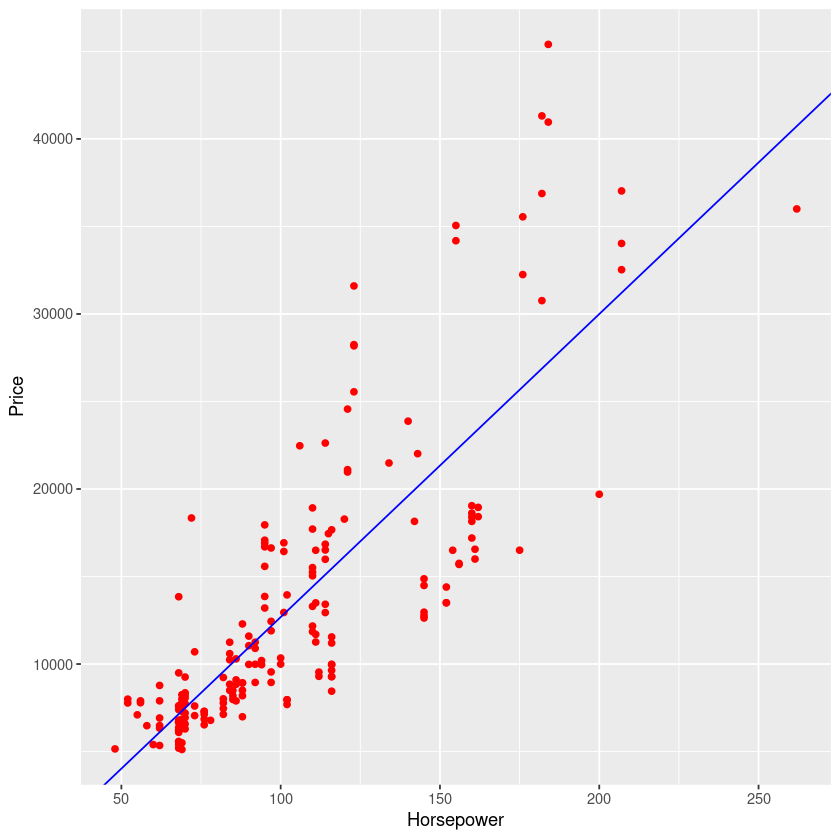

In [27]:
grafico <- ggplot(data = carros, aes(x = horsepower, y = price)) +
 geom_point(color = "red", fill="blue") + xlab("Horsepower") + ylab("Price")
grafico <- grafico + geom_abline(intercept = b_0, slope = b_1, color = "blue")
grafico

A reta corta o eixo Y em -4630.70.

* ii)        Como corrigir um modelo que apresenta este comportamento?

O preço do veículo não pode ser negativo, entendo que temos que limitar nosso modelo para fazer análises apenas para valores posítivos, de forma que o modelo faça sentido no mundo real.

g)    Analise: Será que apenas a potência de um carro é suficiente para termos uma boa previsão do preço deste carro?
* i)        O que indica isso no seu ajuste?

Temos um valor significancia de 0.6583. Não é um valor ruim, mas também não é um valor excelente. Acredito que com a adição de mais variáveis na análise teríamos um modelo que se assemelha mais ao dados, dando uma interpretação mais precisa.